In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split


In [128]:
df = pd.read_csv("C:\Code Files\Project\Bangalore_Housing_Price\BHP.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Manan\AppData\Local\Temp\ipykernel_32456\2935885803.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("C:\Code Files\Project\Bangalore_Housing_Price\BHP.csv")


In [129]:
df.shape

(13320, 9)

In [130]:
df.head()

,\area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [131]:
print(df.columns.tolist())

['\\area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']



DROP THE FEATURES WHICH ARE IRRELEVANT TO US

In [132]:
df = df.drop(
    ['\\area_type', "availability", "society",'balcony'], axis=1
)  # no use as what do we have to do with what society it is in

FILL THE VALUES WHICH ARE NOT PRESENT IN THE DATA


In [133]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [134]:
df = df.dropna()

In [135]:
df["size"] = df["size"].str.extract('(\d+)')
df["size"] = df["size"].astype(int)
df.rename(columns={'size': 'bhk'}, inplace = True)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Manan\AppData\Local\Temp\ipykernel_32456\3505822511.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["size"] = df["size"].str.extract('(\d+)')


,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


Feature Engineering


In [136]:
def convert_sqft(val):
    try:
        if "-" in val:  # for values like 1100 - 1200
            token = val.split("-")  # splits those two parts into 1100 and 1200 separate 
            return (float(token[0]) + float[token[1]]) / 2 # takes the avg 
        return float(val) # if the value is 1100 then simply converts into a a float value 1100.00
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df = df.dropna(subset=['total_sqft'])

In [137]:
df = df.reset_index(drop=True) # when we drop from the main dataframe, sometimes what happens is few rows dissapear and the indexes go missing, so we reset them

In [138]:
df.shape

(13056, 5)

In [139]:
df = df[(df["bhk"] <= 10) & (df["price"] <= 500)]  # or try 1000 for broader view

In [140]:
df.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [141]:
# # BHK vs Price

# plt.figure(figsize = (16, 5))
# plt.subplot(1, 2, 1)
# plt.scatter(df['BHK'] , df["price"], alpha=0.3)
# plt.xlim(0.5, 10.5)
# plt.xticks(range(1, 11))
# plt.xlabel('BHK')
# plt.ylabel('Price')
# plt.title("BHK vs Price")
# plt.grid(True, axis = 'y', linestyle = '--', alpha = 0.3)
# plt.show()


# avg_price = df.groupby('BHK')['price'].mean().reset_index()
# plt.figure(figsize=(16, 5))
# sns.barplot(data = avg_price, x ='BHK', y = 'price',color= 'red')
# plt.xlim(0.5, 10.5)
# plt.xticks(range(1, 11))
# plt.xlabel("BHK")
# plt.ylabel("Price")
# plt.title("BHK vs Price")
# plt.grid(True, axis="y", linestyle="--", alpha=0.3)
# plt.tight_layout()
# plt.show()

# df["price_per_sqft"] = (df["price"] * 100000 / df["total_sqft"])  # assuming price in lakhs

# plt.figure(figsize=(10, 5))
# sns.boxplot(x="BHK", y="price_per_sqft", data=df)
# plt.title("Price per Sqft across BHKs")
# plt.grid(True, axis="y", linestyle="--", alpha=0.3)
# plt.show()

In [142]:
df.loc[30]

location      Bisuvanahalli
bhk                       3
total_sqft           1075.0
bath                    2.0
price                  35.0
Name: 30, dtype: object

In [143]:
df.shape

(12807, 5)

In [144]:
df2 = df.copy()

df2["price_per_sqft"] = df2["price"] * 100000 / df2["total_sqft"]

In [145]:
df2.shape

(12807, 6)

In [146]:
df2.head(10)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,Gandhi Bazar,6,1020.0,6.0,370.00,36274.509804
10,Whitefield,3,1800.0,2.0,70.00,3888.888889


In [147]:
len(df.location.unique())

1271

In [148]:
df2['location'] = df2['location'].apply(lambda x: x.strip()) #a small anonymous function, strip basically takes the spaces off

In [149]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                498
Sarjapur  Road            378
Electronic City           303
Kanakpura Road            260
Thanisandra               225
                         ... 
6th Block Jayanagar         1
6th Block Rajaji Nagar      1
7th Block Koramangala       1
Vijaypura                   1
3rd Phase Iti Layout        1
Name: location, Length: 1260, dtype: int64

In [150]:
location_stats.head(15)

location
Whitefield                  498
Sarjapur  Road              378
Electronic City             303
Kanakpura Road              260
Thanisandra                 225
Yelahanka                   202
Uttarahalli                 185
Marathahalli                174
Raja Rajeshwari Nagar       171
Hebbal                      168
7th Phase JP Nagar          148
Hennur Road                 147
Bannerghatta Road           144
Haralur Road                141
Electronic City Phase II    129
Name: location, dtype: int64

In [151]:
location_stats[location_stats <= 10].count()
len(location_stats[location_stats <= 10])

1025

In [152]:
location_under10 = location_stats[location_stats <= 10]
location_under10.shape

(1025,)

In [153]:
df2.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


put all these 1036 in other as they are less than 10

In [154]:
df2['location'] = df2.location.apply(lambda x: 'other_lessthan10' if x in location_under10 else x)

len(df2.location.unique())

236

In [155]:
df3 = df2.copy()

In [156]:
df3.head(10)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other_lessthan10,6,1020.0,6.0,370.00,36274.509804
10,Whitefield,3,1800.0,2.0,70.00,3888.888889


In [157]:
df3.shape

(12807, 6)

#finding the worth of the house, finding the size of bedroom, larger the value the better

In [158]:
df3[(df3.total_sqft / df3.bhk) <= 300].head() 

,location,bhk,total_sqft,bath,price,price_per_sqft
9,other_lessthan10,6,1020.0,6.0,370.0,36274.509804
44,HSR Layout,8,600.0,9.0,200.0,33333.333333
56,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
66,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
68,other_lessthan10,3,500.0,3.0,100.0,20000.000000


In [159]:
len(df3[(df3.total_sqft / df3.bhk) <= 300])

915

OUTLIER REMOVAL

In [160]:
df4 = df3[~((df3.total_sqft / df3.bhk) <= 300)]
df4.shape

(11892, 6)

In [161]:
df4.price_per_sqft.describe()

count    11892.000000
mean      5930.934905
std       2909.668455
min        267.829813
25%       4183.506736
50%       5230.706854
75%       6717.576787
max      76923.076923
Name: price_per_sqft, dtype: float64

In [162]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft) #mean
        st = np.std(subdf.price_per_sqft) #standard deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <=(m+st))] #removes the extreme outliers which are too far from the mean
        df_out = pd.concat([df_out, reduced_df], ignore_index= True) #combines these 2 dataframes
    return df_out

df5 = remove_pps_outlier(df4)
df5.shape

(9320, 6)

In [163]:
df5.head(10)

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668
5,1st Block Jayanagar,4,2750.0,4.0,413.0,15018.181818
6,1st Block Jayanagar,4,2450.0,4.0,368.0,15020.408163
7,1st Phase JP Nagar,4,2825.0,4.0,250.0,8849.557522
8,1st Phase JP Nagar,3,1875.0,3.0,167.0,8906.666667
9,1st Phase JP Nagar,3,2065.0,4.0,210.0,10169.491525


In [164]:
matplotlib.rcParams["figure.figsize"] = (10,6) #rcParams makes the same size of plots, where are plt.figure only does for that specific 

def plot_scatter(df, location):

    bhk_2 = df[(df.location == location) & (df.bhk == 2)]
    bhk_3 = df[(df.location == location) & (df.bhk == 3)]
    
    print(f"2 BHK: {len(bhk_2)} points, 3 BHK: {len(bhk_3)} points")
    
    if bhk_2.empty and bhk_3.empty:
        print("No data to plot for this location.")
        return

    matplotlib.rcParams["figure.figsize"] = (10, 5)
    plt.scatter(bhk_2.total_sqft, bhk_2.price, color="blue", label="2 BHK", s=50)
    plt.scatter(bhk_3.total_sqft, bhk_3.price, marker="+", color="red", label="3 BHK", s=50)
    plt.xlabel('Total Sqft per Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(location)
    plt.legend()
    plt.show()




2 BHK: 67 points, 3 BHK: 49 points


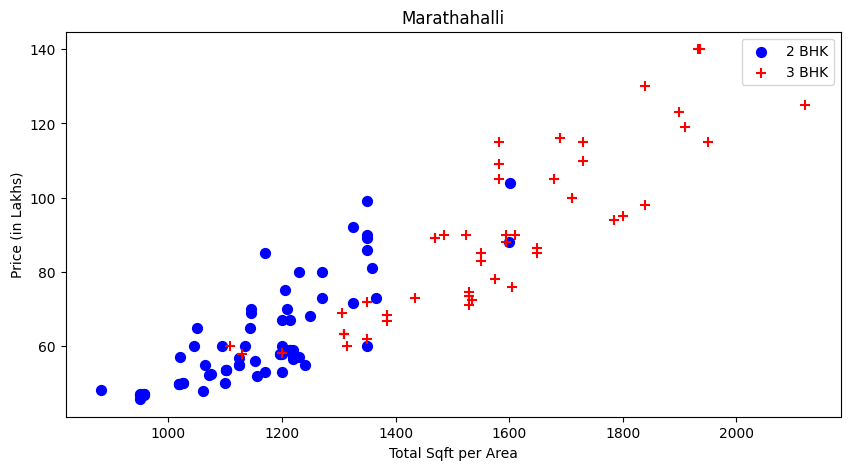

In [165]:
plot_scatter(df5,"Marathahalli")

2 BHK: 11 points, 3 BHK: 31 points


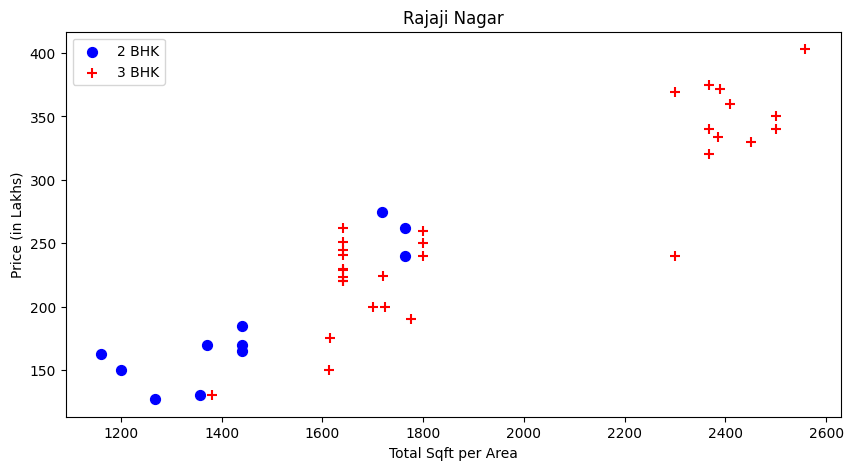

In [166]:
plot_scatter(df5, "Rajaji Nagar")

2 BHK: 34 points, 3 BHK: 57 points


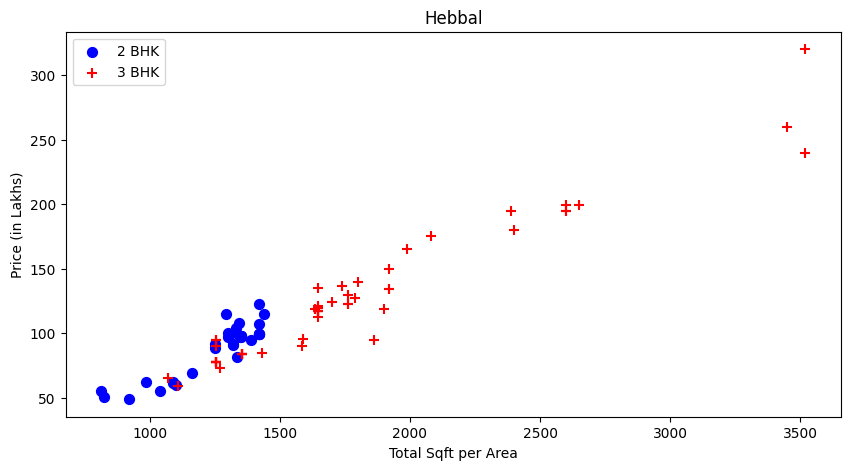

In [167]:
plot_scatter(df5, "Hebbal")

2 BHK: 185 points, 3 BHK: 144 points


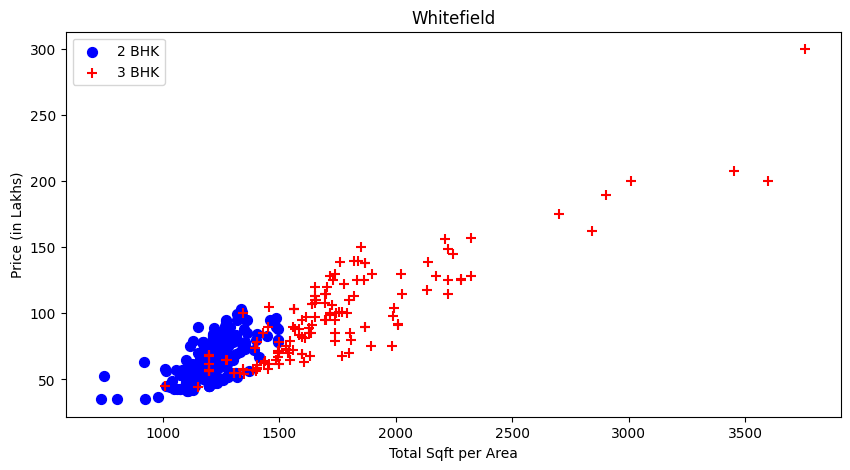

In [168]:
plot_scatter(df5, "Whitefield")

In [171]:
df5.shape

(9320, 6)

In [173]:
def outlier_removal(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df6 = outlier_removal(df5)  
df6.shape


(6642, 6)